# Description

What is an Abalone??

From the Abalone entry on Wikipedia:

   Abalones are marine snails. Their taxonomy puts them in the family Haliotidae which contains only one genus, Haliotis, which once contained six subgenera. These subgenera have become alternate representations of Haliotis. The number of species recognized worldwide ranges between 30 and 130 with over 230 species-level taxa described. The most comprehensive treatment of the family considers 56 species valid, with 18 additional subspecies.
   
   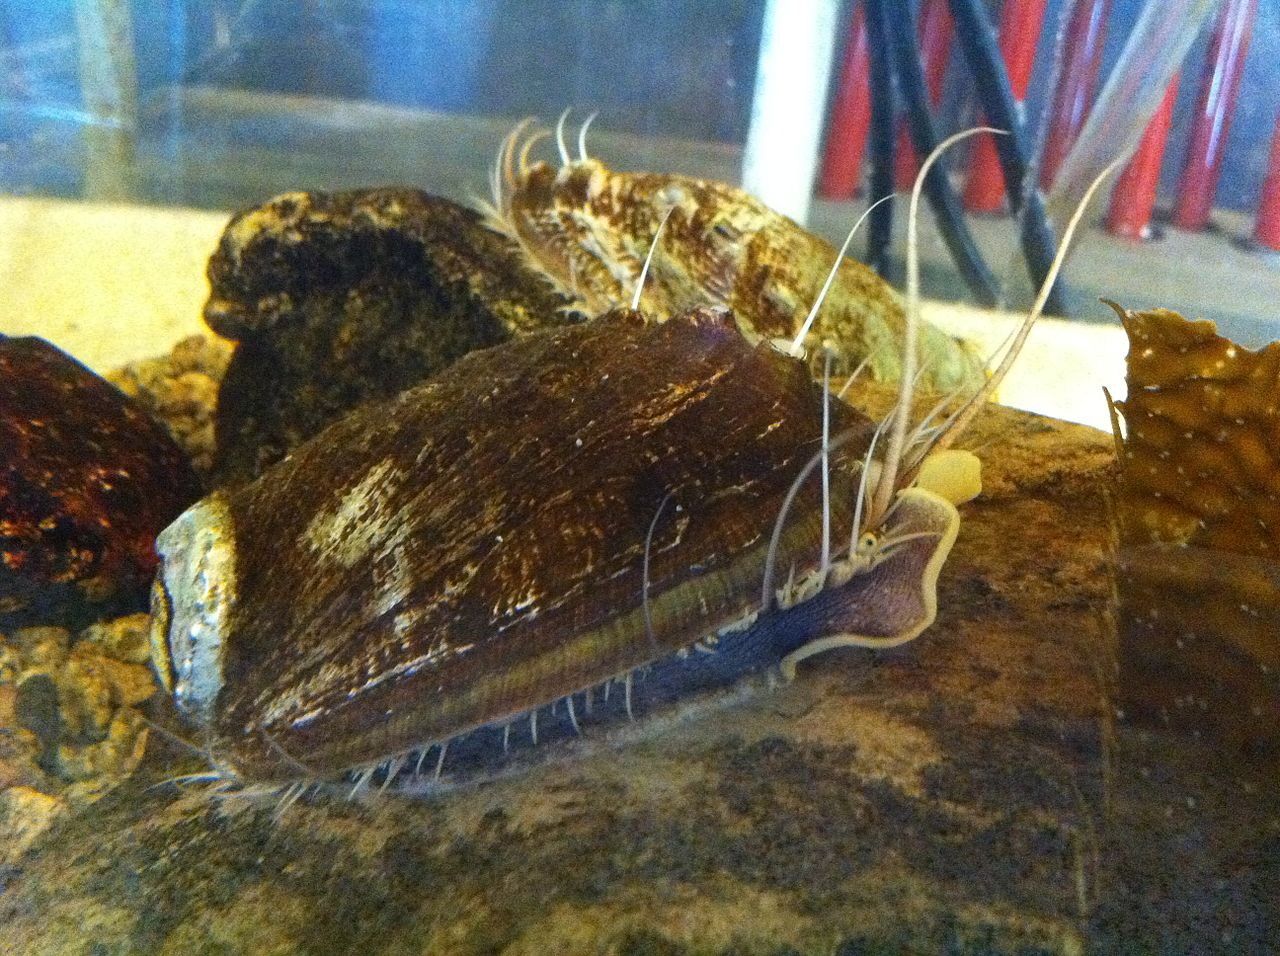

Image 1: A living adult Abalone

Abalones can be found along coasts of almost every continent. Usually, abalones are consumed as food all around the world, by different cultures. However, the bright and variety of colors of the interior side of their shells makes then an valuable object of adornment and decoration.



Image 2: The inner side of an abalone shell






The original stated problem is to estimate the age of an abalone, which can be determined from the number of rings in their shell. However, counting the number of rings in an abalone shell is an expensive method. Thus, one possible solution is predict the number of rings of an abalone from characteristics like height, diameter, lenght and weight measurements.

Given in the dataset is samples data of 4177 abalones and their ring counts. No of Rings varies from 1 to 29. Thus we will use regression approach for this.

In [153]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [154]:
# Importing Dataset into a Dataframe
abalone=pd.read_csv('abalone.csv')

Statistical Analysis of Dataset

In [155]:
#to display complete data
pd.set_option('display.max_rows',None)

In [156]:
abalone

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535     0.405   0.145        0.6845          0.2725   
14     F   0.470     0.355   0.100        0.4755          0.1675   
15     M   0.500     0.400   0.130        0.6645          0.2580   
16     I   0.355     0.280   0.085        0.2905          0.0950   
17     F   0.440     0.340   0.100        0.4510          0.1880   
18     M   0.365     0.295   0.080        0.2555          0.0970   
19     M   0.450     0.320   0.100        0.3810          0.1705   
20     M   0.355     0.280   0.095        0.2455          0.0955   
21     I   0.380     0.275   0.100        0.2255          0.0800   
22     F   0.565     0.440   0.155        0.9395          0.4275   
23     F   0.550     0.415   0.135        0.7635          0.3180   
24     F   0.615     0.480   0.165        1.1615          0.5130   
25     F   0.560     0.440   0.140        0.9285          0.3825   
26     F   0.580     0.450   0.185        0.9955          0.3945   
27     M   0.590     0.445   0.140        0.9310          0.3560   
28     M   0.605     0.475   0.180        0.9365          0.3940   
29     M   0.575     0.425   0.140        0.8635          0.3930   
30     M   0.580     0.470   0.165        0.9975          0.3935   
31     F   0.680     0.560   0.165        1.6390          0.6055   
32     M   0.665     0.525   0.165        1.3380          0.5515   
33     F   0.680     0.550   0.175        1.7980          0.8150   
34     F   0.705     0.550   0.200        1.7095          0.6330   
35     M   0.465     0.355   0.105        0.4795          0.2270   
36     F   0.540     0.475   0.155        1.2170          0.5305   
37     F   0.450     0.355   0.105        0.5225          0.2370   
38     F   0.575     0.445   0.135        0.8830          0.3810   
39     M   0.355     0.290   0.090        0.3275          0.1340   
40     F   0.450     0.335   0.105        0.4250          0.1865   
41     F   0.550     0.425   0.135        0.8515          0.3620   
42     I   0.240     0.175   0.045        0.0700          0.0315   
43     I   0.205     0.150   0.055        0.0420          0.0255   
44     I   0.210     0.150   0.050        0.0420          0.0175   
45     I   0.390     0.295   0.095        0.2030          0.0875   
46     M   0.470     0.370   0.120        0.5795          0.2930   
47     F   0.460     0.375   0.120        0.4605          0.1775   
48     I   0.325     0.245   0.070        0.1610          0.0755   
49     F   0.525     0.425   0.160        0.8355          0.3545   
50     I   0.520     0.410   0.120        0.5950          0.2385   
51     M   0.400     0.320   0.095        0.3030          0.1335   
52     M   0.485     0.360   0.130        0.5415          0.2595   
53     F   0.470     0.360   0.120        0.4775          0.2105   
54     M   0.405     0.310   0.100        0.3850          0.1730   
55     F   0.500     0.400   0.140        0.6615          0.2565   
56     M   0.445     0.350   0.120        0.4425          0.1920   
57     M   0.470     0.385   0.135        0.5895          0.2

In [157]:
abalone.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

From the above matrix we can see,there are total 4177 rows. There isn't much difference between mean and median in the columnns. A very little skewness is observed. Height column shows a difference in 75th percentile and max value which represent Outliers. 

In [158]:
#Checking Null Values
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

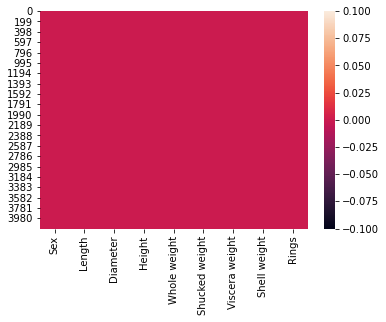

In [159]:
#Plotting Heatmap to check null values
sns.heatmap(abalone.isnull())

In [160]:
#Checking shape of the datset
abalone.shape

(4177, 9)

In [161]:
#Checking Data Types
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We observe the Data in Sex Column is String type so we need to convert it Using Label Encoder

# Applying Label Encoding

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
le=LabelEncoder()
    
abalone['Sex']=le.fit_transform(abalone['Sex'])

In [164]:
abalone

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
5       1   0.425     0.300   0.095        0.3515          0.1410   
6       0   0.530     0.415   0.150        0.7775          0.2370   
7       0   0.545     0.425   0.125        0.7680          0.2940   
8       2   0.475     0.370   0.125        0.5095          0.2165   
9       0   0.550     0.440   0.150        0.8945          0.3145   
10      0   0.525     0.380   0.140        0.6065          0.1940   
11      2   0.430     0.350   0.110        0.4060          0.1675   
12      2   0.490     0.380   0.135        0.5415          0.2175   
13      0   0.535     0.405   0.145        0.6845          0.2725   
14      0   0.470     0.355   0.100        0.4755          0.1675   
15      2   0.500     0.400   0.130        0.6645          0.2580   
16      1   0.355     0.280   0.085        0.2905          0.0950   
17      0   0.440     0.340   0.100        0.4510          0.1880   
18      2   0.365     0.295   0.080        0.2555          0.0970   
19      2   0.450     0.320   0.100        0.3810          0.1705   
20      2   0.355     0.280   0.095        0.2455          0.0955   
21      1   0.380     0.275   0.100        0.2255          0.0800   
22      0   0.565     0.440   0.155        0.9395          0.4275   
23      0   0.550     0.415   0.135        0.7635          0.3180   
24      0   0.615     0.480   0.165        1.1615          0.5130   
25      0   0.560     0.440   0.140        0.9285          0.3825   
26      0   0.580     0.450   0.185        0.9955          0.3945   
27      2   0.590     0.445   0.140        0.9310          0.3560   
28      2   0.605     0.475   0.180        0.9365          0.3940   
29      2   0.575     0.425   0.140        0.8635          0.3930   
30      2   0.580     0.470   0.165        0.9975          0.3935   
31      0   0.680     0.560   0.165        1.6390          0.6055   
32      2   0.665     0.525   0.165        1.3380          0.5515   
33      0   0.680     0.550   0.175        1.7980          0.8150   
34      0   0.705     0.550   0.200        1.7095          0.6330   
35      2   0.465     0.355   0.105        0.4795          0.2270   
36      0   0.540     0.475   0.155        1.2170          0.5305   
37      0   0.450     0.355   0.105        0.5225          0.2370   
38      0   0.575     0.445   0.135        0.8830          0.3810   
39      2   0.355     0.290   0.090        0.3275          0.1340   
40      0   0.450     0.335   0.105        0.4250          0.1865   
41      0   0.550     0.425   0.135        0.8515          0.3620   
42      1   0.240     0.175   0.045        0.0700          0.0315   
43      1   0.205     0.150   0.055        0.0420          0.0255   
44      1   0.210     0.150   0.050        0.0420          0.0175   
45      1   0.390     0.295   0.095        0.2030          0.0875   
46      2   0.470     0.370   0.120        0.5795          0.2930   
47      0   0.460     0.375   0.120        0.4605          0.1775   
48      1   0.325     0.245   0.070        0.1610          0.0755   
49      0   0.525     0.425   0.160        0.8355          0.3545   
50      1   0.520     0.410   0.120        0.5950          0.2385   
51      2   0.400     0.320   0.095        0.3030          0.1335   
52      2   0.485     0.360   0.130        0.5415          0.2595   
53      0   0.470     0.360   0.120        0.4775          0.2105   
54      2   0.405     0.310   0.100        0.3850          0.1730   
55      0   0.500     0.400   0.140        0.6615          0.2565   
56      2   0.445     0.350   0.120        0.4425          0.1920   
57  

As we see the Sex column has been encoded. 

Vakues are changed as :
    M = 2,
    F = 0,
    I = 1

# Observing the target variable

In [165]:
abalone['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [166]:
abalone.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

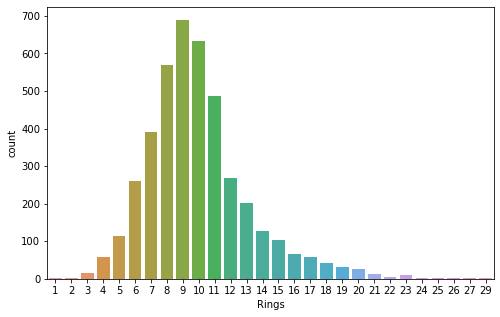

In [167]:
#Graphical Representation of above analysis
plt.figure(figsize=(8,5))
sns.countplot(x='Rings', data=abalone)

Values range from 1 to 29. Maximum ring count is between 6 to 13

In [168]:
#Observing Sex columns
abalone.Sex.value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

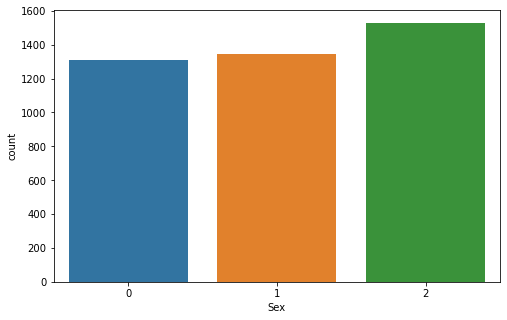

In [169]:
#Graphical Representation of above analysis
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=abalone)

Graphical observation of Rings Column

<AxesSubplot:xlabel='Rings'>

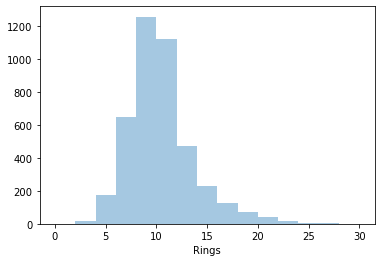

In [170]:
sns.distplot(abalone['Rings'], kde=False, bins=range(0, 31, 2))

<AxesSubplot:xlabel='Rings', ylabel='Density'>

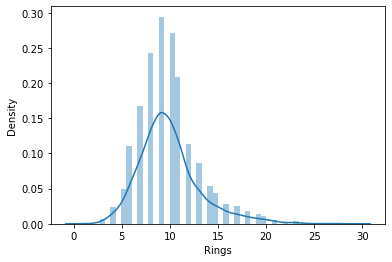

In [171]:
sns.distplot(abalone['Rings'])

<AxesSubplot:xlabel='Rings'>

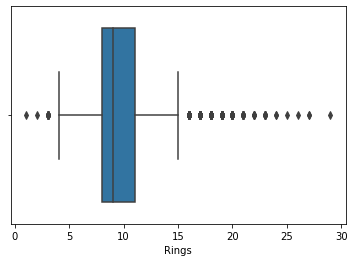

In [172]:
sns.boxplot(abalone['Rings'])

As stated above data is distributed almost uniformely. Maximum values lies between 5-15.In box plot as well no extreme outliers are present.

# Checking Correlation

In [173]:
abalone_cor=abalone.corr()
abalone_cor

Sex    Length  Diameter    Height  Whole weight  \
Sex             1.000000 -0.036066 -0.038874 -0.042077     -0.021391   
Length         -0.036066  1.000000  0.986812  0.827554      0.925261   
Diameter       -0.038874  0.986812  1.000000  0.833684      0.925452   
Height         -0.042077  0.827554  0.833684  1.000000      0.819221   
Whole weight   -0.021391  0.925261  0.925452  0.819221      1.000000   
Shucked weight -0.001373  0.897914  0.893162  0.774972      0.969405   
Viscera weight -0.032067  0.903018  0.899724  0.798319      0.966375   
Shell weight   -0.034854  0.897706  0.905330  0.817338      0.955355   
Rings          -0.034627  0.556720  0.574660  0.557467      0.540390   

                Shucked weight  Viscera weight  Shell weight     Rings  
Sex                  -0.001373       -0.032067     -0.034854 -0.034627  
Length                0.897914        0.903018      0.897706  0.556720  
Diameter              0.893162        0.899724      0.905330  0.574660  
Height                0.774972        0.798319      0.817338  0.557467  
Whole weight          0.969405        0.966375      0.955355  0.540390  
Shucked weight        1.000000        0.931961      0.882617  0.420884  
Viscera weight        0.931961        1.000000      0.907656  0.503819  
Shell weight          0.882617        0.907656      1.000000  0.627574  
Rings                 0.420884        0.503819      0.627574  1.000000

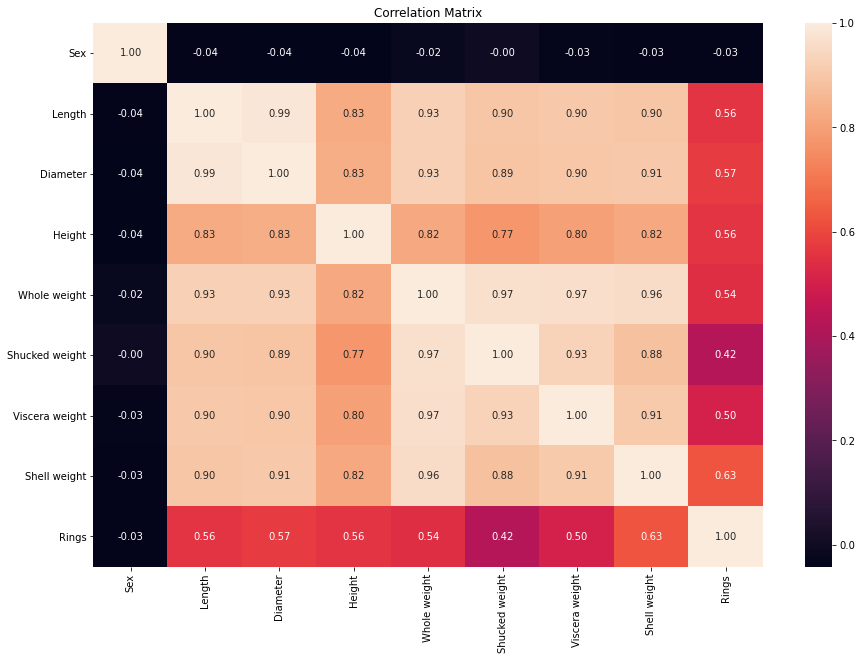

In [174]:
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(abalone_cor,annot=True,fmt='.2f')
plt.show()


As seen above we see a correlation between Rings and Shell weight which is around 0.63. Lenght, Height, Diameter and Whole weight too shows correlation above 0.5. Let us check relation of these columns individually with target variable.

# Bivariate Analysis

Using Scatter Plot

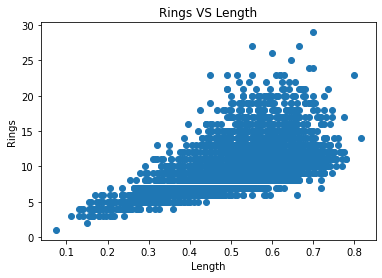

In [175]:
#Rings VS Length
plt.title('Rings VS Length')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.scatter(abalone['Length'],abalone['Rings'])
plt.show()

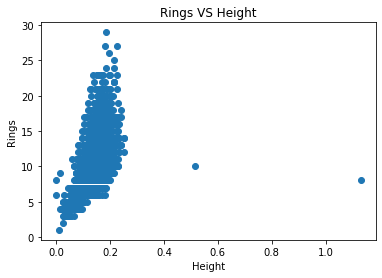

In [176]:
#Rings VS Height
plt.title('Rings VS Height')
plt.xlabel('Height')
plt.ylabel('Rings')
plt.scatter(abalone['Height'],abalone['Rings'])
plt.show()

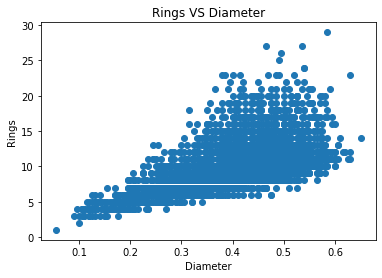

In [177]:
#Rings VS Diameter
plt.title('Rings VS Diameter')
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.scatter(abalone['Diameter'],abalone['Rings'])
plt.show()

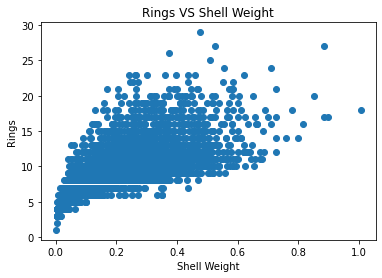

In [178]:
#Rings VS Shell Weight
plt.title('Rings VS Shell Weight')
plt.xlabel('Shell Weight')
plt.ylabel('Rings')
plt.scatter(abalone['Shell weight'],abalone['Rings'])
plt.show()

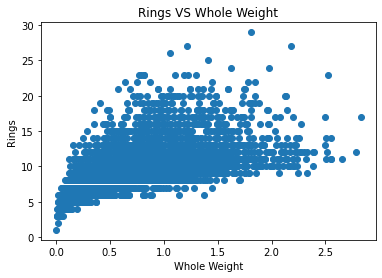

In [179]:
#Rings VS Whole Weight
plt.title('Rings VS Whole Weight')
plt.xlabel('Whole Weight')
plt.ylabel('Rings')
plt.scatter(abalone['Whole weight'],abalone['Rings'])
plt.show()

Using Joint Plot

<Figure size 1440x360 with 0 Axes>

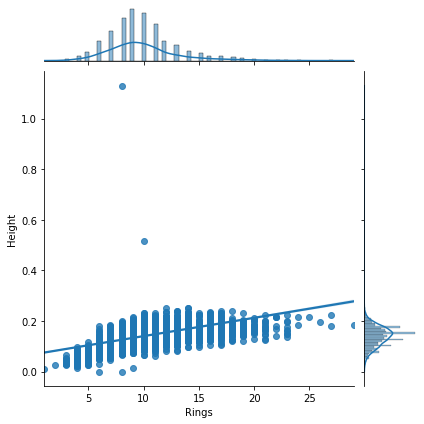

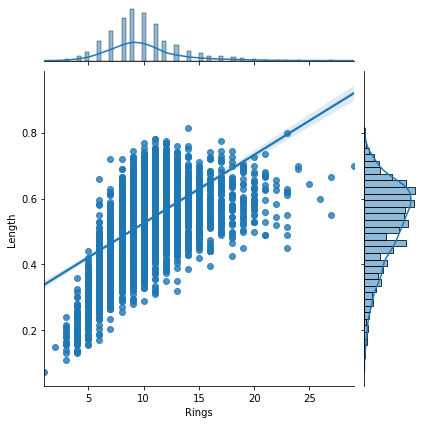

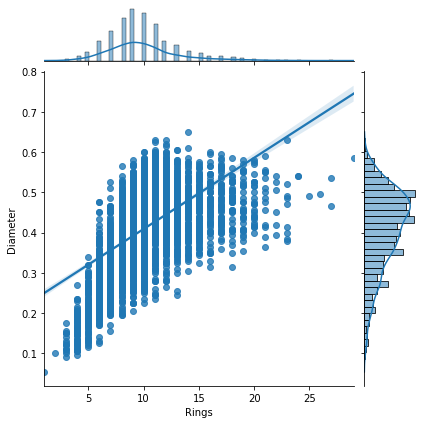

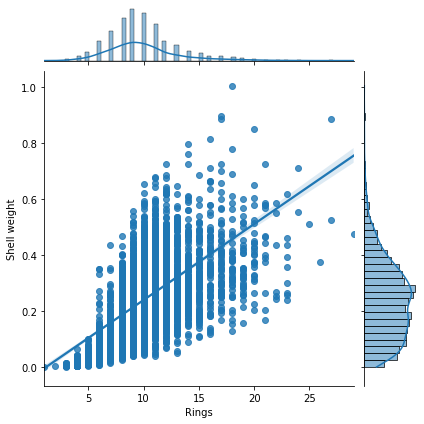

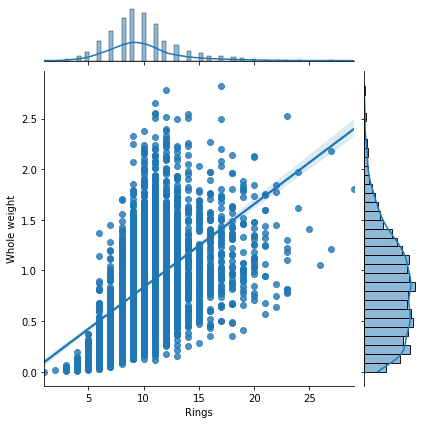

In [180]:
plt.figure(figsize=(20, 5))

sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg')
sns.jointplot(data=abalone, x='Rings', y='Length', kind='reg')
sns.jointplot(data=abalone, x='Rings', y='Diameter', kind='reg')

sns.jointplot(data=abalone, x='Rings', y='Shell weight', kind='reg')
sns.jointplot(data=abalone, x='Rings', y='Whole weight', kind='reg')

Above observations shows positive relationship.

With increase in Length and Diameter there is a increse in Ring Count.
With Shell weight and Whole Weight also we see positive relation.
Height shows positive relation within a range from 0-0.2. Peaking formation is due to presence of outliers.

As we see maximum ring values are between 5 to 15. Lets reduce the Ring values to max 11 and check the correlation with these values.


In [181]:
abalone_ring=abalone[abalone['Rings']<12]

In [182]:
abalone_ring_cor=abalone_ring.corr()

<AxesSubplot:>

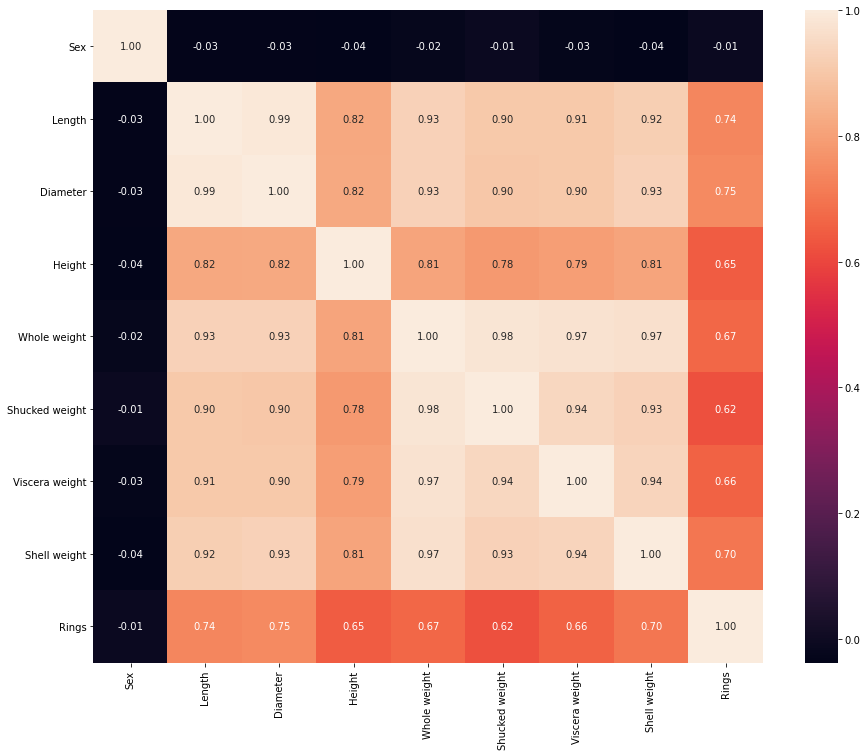

In [183]:
plt.figure(figsize=(15,12))
sns.heatmap(abalone_ring_cor,annot=True,fmt='.2f')

As we can see the correlation values with Ring column has increased. This shows that the maximum impact of the given 7 factors on the ring count is till the age of around 10 to 12 years.

# Checking Outliers

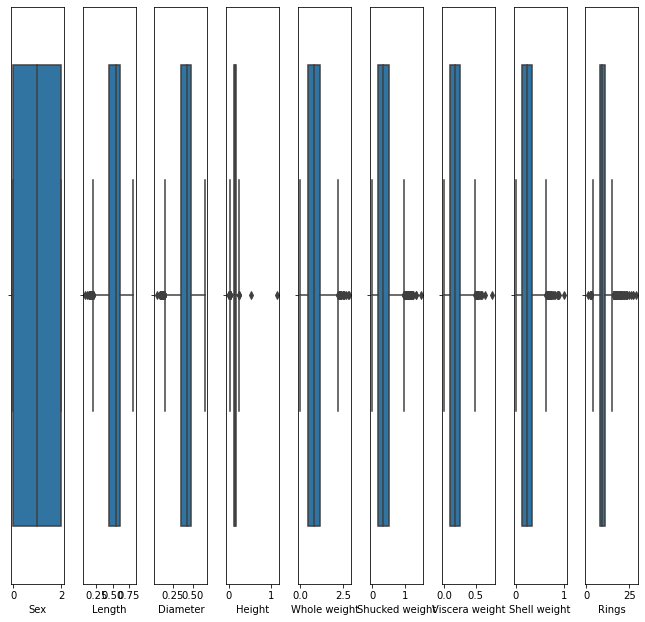

In [184]:
#Using Boxplot to plot outliers
collist=abalone.columns.values
nrows=14
ncol=40
plt.figure(figsize=(ncol,3*ncol))
           
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(abalone[collist[i]],orient='v')
    plt.tight_layout()
    

# Removing Outliers

In [185]:
#Importing Zscore from Scipy
from scipy.stats import zscore

In [186]:
#Evaluating ZScore
z=np.abs(zscore(abalone))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [187]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [247]:
abalone_new=abalone[(z<3).all(axis=1)]

In [248]:
#Checking original datset shape
abalone.shape

(4177, 9)

In [345]:
##Checking datset shape after outlier removal
abalone_new.shape

(4027, 9)

In [346]:
abalone_new

Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0     1.134329 -0.684451 -0.543379 -1.158933     -0.575135       -0.540865   
1     1.134329 -1.411739 -1.401132 -1.280406     -1.354050       -1.311318   
2    -1.313068 -0.046219  0.037163 -0.128305     -0.184498       -0.362705   
3     1.134329 -0.799651 -0.543379 -0.395963     -0.570150       -0.592261   
4    -0.008746 -1.530577 -1.474343 -1.518600     -1.414577       -1.378735   
5    -0.008746 -0.910929 -1.127702 -1.158933     -0.998202       -1.041253   
6    -1.313068  0.094571  0.094177 -0.395963      0.021032       -0.162554   
7     1.134329 -0.524583 -0.494013 -0.395963     -0.586369       -0.586522   
8    -1.313068  0.142522  0.269661  0.286070      0.293640       -0.056846   
9    -1.313068 -0.092140 -0.393287  0.008087     -0.349704       -0.717429   
10    1.134329 -0.874266 -0.687566 -0.784845     -0.852153       -0.876531   
11    1.134329 -0.399857 -0.393287 -0.128305     -0.507034       -0.580789   
12   -1.313068  0.000204 -0.129536  0.146208     -0.167239       -0.276204   
13   -1.313068 -0.565232 -0.640149 -1.035858     -0.672091       -0.876531   
14    1.134329 -0.314352 -0.183677 -0.262984     -0.213395       -0.354524   
15   -0.008746 -1.381100 -1.287279 -1.400290     -1.167139       -1.341539   
16   -1.313068 -0.799651 -0.780494 -1.035858     -0.734808       -0.752976   
17    1.134329 -1.318684 -1.168447 -1.518600     -1.266860       -1.328084   
18    1.134329 -0.723293 -0.958901 -1.035858     -0.918598       -0.858244   
19    1.134329 -1.381100 -1.287279 -1.158933     -1.295744       -1.338172   
20   -0.008746 -1.222165 -1.325776 -1.035858     -1.354050       -1.443664   
21   -1.313068  0.289495  0.269661  0.427688      0.387242        0.483590   
22   -1.313068  0.142522 -0.019123 -0.128305      0.011062       -0.039050   
23   -1.313068  0.814387  0.771411  0.716250      0.826003        0.850856   
24   -1.313068  0.239981  0.269661  0.008087      0.364517        0.276477   
25   -1.313068  0.441229  0.390420  1.315082      0.501421        0.332706   
26    1.134329  0.545081  0.329659  0.008087      0.369690        0.149622   
27    1.134329  0.704986  0.705921  1.162624      0.381054        0.330378   
28    1.134329  0.390115  0.094177  0.008087      0.228161        0.325718   
29    1.134329  0.441229  0.641238  0.716250      0.505453        0.328048   
30   -1.313068  1.582458  1.934906  0.716250      1.663479        1.214048   
31    1.134329  1.396196  1.398295  0.716250      1.150739        1.006042   
32   -1.313068  1.582458  1.777031  1.012009      1.916377        1.929535   
33   -1.313068  1.905427  1.777031  1.783657      1.777019        1.315914   
34    1.134329 -0.605424 -0.640149 -0.911166     -0.661928       -0.526691   
35   -1.313068  0.047133  0.705921  0.427688      0.930245        0.922135   
36   -1.313068 -0.723293 -0.640149 -0.911166     -0.553985       -0.470433   
37   -1.313068  0.390115  0.329659 -0.128305      0.269446        0.269396   
38    1.134329 -1.381100 -1.208620 -1.280406     -1.063956       -1.085745   
39   -1.313068 -0.723293 -0.826017 -0.911166     -0.802260       -0.761906   
40   -1.313068  0.142522  0.094177 -0.128305      0.202589        0.178674   
41   -0.008746 -1.996473 -1.988054 -2.303792     -1.834280       -1.789279   
42   -0.008746 -2.149769 -2.124454 -2.086991     -1.926378       -1.833765   
43   -0.008746 -2.128756 -2.124454 -2.196132     -1.926378       -1.893703   
44   -0.008746 -1.155851 -1.168447 -1.158933     -1.420525       -1.392333   
45    1.134329 -0.565232 -0.494013 -0.527257     -0.414451       -0.167775   
46   -1.313068 -0.645163 -0.443985 -0.527257     -0.710393       -0.815850   
47   -0.008746 -1.559373 -1.545454 -1.750547     -1.547212       -1.474726   
48   -1.313068 -0.092140  0.094177  0.571077      0.168294        0.142328   
49   -0.008746 -0.137564 -0.074687 -0.527257     -0.377178       -0.462054   
50    1.134329 -1.087931 -0.95890

# Calculating Loss Percentage

In [250]:
loss=(4177-4027)/4177*100
print(loss)

3.5910940866650707


We observe a 3% data loss

# Checking Skewness

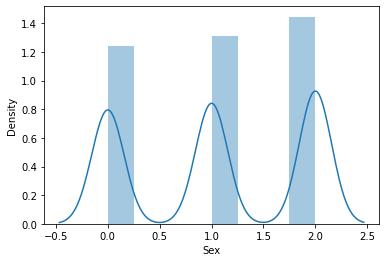

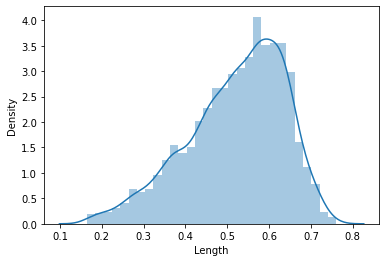

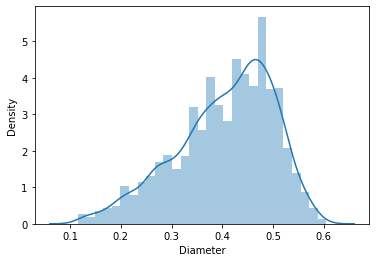

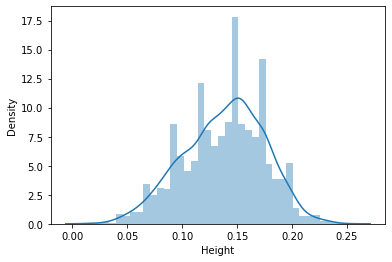

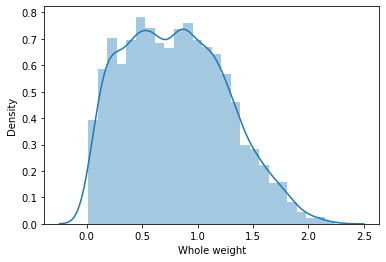

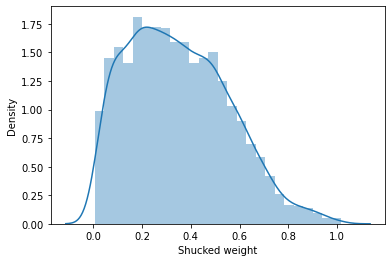

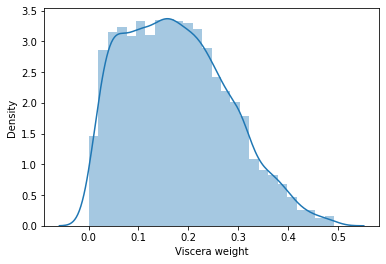

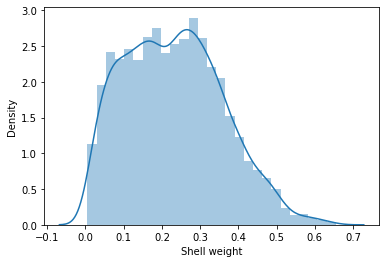

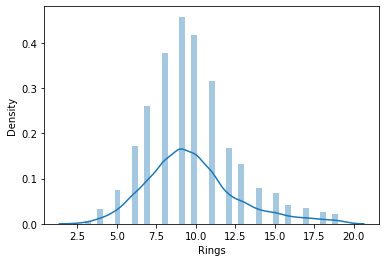

In [251]:
#Checking skewness using Distplot for each column
for i in abalone_new.columns:
    plt.figure()
    sns.distplot(abalone_new[i])

In [253]:
abalone_new.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

# Removing Skewness

In [254]:
#Importing Power Transform
from sklearn.preprocessing import power_transform

In [255]:
abalone_skew=power_transform(abalone_new)

In [256]:
abalone_new=pd.DataFrame(abalone_skew,columns=abalone_new.columns)

In [257]:
abalone_new.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Rings             0.004745
dtype: float64

In [258]:
abalone_new

Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0     1.134329 -0.684451 -0.543379 -1.158933     -0.575135       -0.540865   
1     1.134329 -1.411739 -1.401132 -1.280406     -1.354050       -1.311318   
2    -1.313068 -0.046219  0.037163 -0.128305     -0.184498       -0.362705   
3     1.134329 -0.799651 -0.543379 -0.395963     -0.570150       -0.592261   
4    -0.008746 -1.530577 -1.474343 -1.518600     -1.414577       -1.378735   
5    -0.008746 -0.910929 -1.127702 -1.158933     -0.998202       -1.041253   
6    -1.313068  0.094571  0.094177 -0.395963      0.021032       -0.162554   
7     1.134329 -0.524583 -0.494013 -0.395963     -0.586369       -0.586522   
8    -1.313068  0.142522  0.269661  0.286070      0.293640       -0.056846   
9    -1.313068 -0.092140 -0.393287  0.008087     -0.349704       -0.717429   
10    1.134329 -0.874266 -0.687566 -0.784845     -0.852153       -0.876531   
11    1.134329 -0.399857 -0.393287 -0.128305     -0.507034       -0.580789   
12   -1.313068  0.000204 -0.129536  0.146208     -0.167239       -0.276204   
13   -1.313068 -0.565232 -0.640149 -1.035858     -0.672091       -0.876531   
14    1.134329 -0.314352 -0.183677 -0.262984     -0.213395       -0.354524   
15   -0.008746 -1.381100 -1.287279 -1.400290     -1.167139       -1.341539   
16   -1.313068 -0.799651 -0.780494 -1.035858     -0.734808       -0.752976   
17    1.134329 -1.318684 -1.168447 -1.518600     -1.266860       -1.328084   
18    1.134329 -0.723293 -0.958901 -1.035858     -0.918598       -0.858244   
19    1.134329 -1.381100 -1.287279 -1.158933     -1.295744       -1.338172   
20   -0.008746 -1.222165 -1.325776 -1.035858     -1.354050       -1.443664   
21   -1.313068  0.289495  0.269661  0.427688      0.387242        0.483590   
22   -1.313068  0.142522 -0.019123 -0.128305      0.011062       -0.039050   
23   -1.313068  0.814387  0.771411  0.716250      0.826003        0.850856   
24   -1.313068  0.239981  0.269661  0.008087      0.364517        0.276477   
25   -1.313068  0.441229  0.390420  1.315082      0.501421        0.332706   
26    1.134329  0.545081  0.329659  0.008087      0.369690        0.149622   
27    1.134329  0.704986  0.705921  1.162624      0.381054        0.330378   
28    1.134329  0.390115  0.094177  0.008087      0.228161        0.325718   
29    1.134329  0.441229  0.641238  0.716250      0.505453        0.328048   
30   -1.313068  1.582458  1.934906  0.716250      1.663479        1.214048   
31    1.134329  1.396196  1.398295  0.716250      1.150739        1.006042   
32   -1.313068  1.582458  1.777031  1.012009      1.916377        1.929535   
33   -1.313068  1.905427  1.777031  1.783657      1.777019        1.315914   
34    1.134329 -0.605424 -0.640149 -0.911166     -0.661928       -0.526691   
35   -1.313068  0.047133  0.705921  0.427688      0.930245        0.922135   
36   -1.313068 -0.723293 -0.640149 -0.911166     -0.553985       -0.470433   
37   -1.313068  0.390115  0.329659 -0.128305      0.269446        0.269396   
38    1.134329 -1.381100 -1.208620 -1.280406     -1.063956       -1.085745   
39   -1.313068 -0.723293 -0.826017 -0.911166     -0.802260       -0.761906   
40   -1.313068  0.142522  0.094177 -0.128305      0.202589        0.178674   
41   -0.008746 -1.996473 -1.988054 -2.303792     -1.834280       -1.789279   
42   -0.008746 -2.149769 -2.124454 -2.086991     -1.926378       -1.833765   
43   -0.008746 -2.128756 -2.124454 -2.196132     -1.926378       -1.893703   
44   -0.008746 -1.155851 -1.168447 -1.158933     -1.420525       -1.392333   
45    1.134329 -0.565232 -0.494013 -0.527257     -0.414451       -0.167775   
46   -1.313068 -0.645163 -0.443985 -0.527257     -0.710393       -0.815850   
47   -0.008746 -1.559373 -1.545454 -1.750547     -1.547212       -1.474726   
48   -1.313068 -0.092140  0.094177  0.571077      0.168294        0.142328   
49   -0.008746 -0.137564 -0.074687 -0.527257     -0.377178       -0.462054   
50    1.134329 -1.087931 -0.95890

# Creating Train Test Split

In [275]:
# Importing Regression Algorithms
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [260]:
# Creating Input and Test variables
x=abalone_new.drop('Rings',axis=1)
y=abalone_new.iloc[:,-1]
x.shape

(4027, 8)

Finding Best Random State

In [323]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    svr=SVR()
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,i)==round(r2_score(y_test,pred_test)*100,i):
        print('At Random state : ',i)
        print('Training R2 Score is : ',r2_score(y_train,pred_train)*100)
        print('Test R2 Score is : ',r2_score(y_test,pred_test)*100)

At Random state :  307
Training R2 Score is :  63.232036549159254
Test R2 Score is :  61.049365440532675
At Random state :  308
Training R2 Score is :  64.11209764229986
Test R2 Score is :  59.433555583453625


As we get the best results at Random State = 307, we will create train_test split using the same.

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=307)

# Training With Different Algorithms

In [298]:
# With Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print('Mean Squared Error :',mean_squared_error(y_test,lr_pred)*100)
print('Mean Absolute Error is : ',mean_absolute_error(y_test,lr_pred)*100)
print('Root Mean Squared Error is : ',np.sqrt(mean_squared_error(y_test,lr_pred))*100)


print('R2 Score is : ',r2_score(y_test,lr_pred)*100)

Mean Squared Error : 46.49921471355087
Mean Absolute Error is :  52.13436866297457
Root Mean Squared Error is :  68.1903326825371
R2 Score is :  54.21061102066598


In [320]:
#With Support Vector Regressor
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)

print('Mean Squared Error :',mean_squared_error(y_test,svr_pred)*100)
print('Mean Absolute Error is : ',mean_absolute_error(y_test,svr_pred)*100)
print('Root Mean Squared Error is : ',np.sqrt(mean_squared_error(y_test,svr_pred))*100)


print('R2 Score is : ',r2_score(y_test,svr_pred)*100)

Mean Squared Error : 39.499583829583464
Mean Absolute Error is :  47.050593360309776
Root Mean Squared Error is :  62.84869436160426
R2 Score is :  61.1033902478459


In [300]:
# With Decision Tree
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)

print('Mean Squared Error :',mean_squared_error(y_test,dtr_pred)*100)
print('Mean Absolute Error is : ',mean_absolute_error(y_test,dtr_pred)*100)
print('Root Mean Squared Error is : ',np.sqrt(mean_squared_error(y_test,dtr_pred))*100)


print('R2 Score is : ',r2_score(y_test,dtr_pred)*100)

Mean Squared Error : 81.68744381903132
Mean Absolute Error is :  66.2233553008688
Root Mean Squared Error is :  90.38110633259106
R2 Score is :  19.55954175142056


In [301]:
# With Random Forest
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)

print('Mean Squared Error :',mean_squared_error(y_test,rfr_pred)*100)
print('Mean Absolute Error is : ',mean_absolute_error(y_test,rfr_pred)*100)
print('Root Mean Squared Error is : ',np.sqrt(mean_squared_error(y_test,rfr_pred))*100)


print('R2 Score is : ',r2_score(y_test,rfr_pred)*100)

Mean Squared Error : 41.088482652306766
Mean Absolute Error is :  48.924224593271035
Root Mean Squared Error is :  64.10029848004358
R2 Score is :  59.53874648578081


# Cross Validating Score of Algorithms

In [325]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score of Linear Regression model is : ',cvs.mean())
print('R2 Score of the Model is : ',r2_score(y_test,lr_pred))

Cross Validation Score of Linear Regression model is :  0.47394424164815663
R2 Score of the Model is :  0.5421061102066598


In [326]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svr,x,y,cv=5)
print('Cross Validation Score of SVR model is : ',cvs.mean())
print('R2 Score of the Model is : ',r2_score(y_test,svr_pred))

Cross Validation Score of SVR model is :  0.5784754270532165
R2 Score of the Model is :  0.611033902478459


In [327]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dtr,x,y,cv=5)
print('Cross Validation Score of DTR model is : ',cvs.mean())
print('R2 Score of the Model is : ',r2_score(y_test,dtr_pred))

Cross Validation Score of DTR model is :  0.13985577019650733
R2 Score of the Model is :  0.19559541751420562


In [328]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rfr,x,y,cv=5)
print('Cross Validation Score of RFR model is : ',cvs.mean())
print('R2 Score of the Model is : ',r2_score(y_test,rfr_pred))

Cross Validation Score of RFR model is :  0.5407003961900407
R2 Score of the Model is :  0.5953874648578081


As we can see least difference in the R2 score and Cross Validation score is of SVR model. Thus we will check with various CV values. 

In [304]:
from sklearn.model_selection import cross_val_score
r2score=r2_score(y_test,svr_pred)
for j in range(3,8):
    r2score_cvl=cross_val_score(svr,x,y,cv=j)
    r2mean=r2score_cvl.mean()
    print('At CV =  : ',j)
    print('Cross Validation Score of the Model is : ',r2mean*100)
    print('R2 Score of Model : ', r2score*100)

At CV =  :  3
Cross Validation Score of the Model is :  60.84345325245825
R2 Score of Model :  61.1033902478459
At CV =  :  4
Cross Validation Score of the Model is :  58.47622713520273
R2 Score of Model :  61.1033902478459
At CV =  :  5
Cross Validation Score of the Model is :  57.84754270532165
R2 Score of Model :  61.1033902478459
At CV =  :  6
Cross Validation Score of the Model is :  58.159196080752466
R2 Score of Model :  61.1033902478459
At CV =  :  7
Cross Validation Score of the Model is :  58.44974474611774
R2 Score of Model :  61.1033902478459


As we can see there isnt much difference in the values when CV is between 4 to 7. Thus we will move ahead with Support Vector Regressor. 

# Saving The Model

In [329]:
import joblib

In [331]:
joblib.dump(svr,'abalone.obj')

['abalone.obj']